In [1]:
# transfer of learning for perturbation, using the idea of backprop + hebbian
# test different lasting and amplitude of perturbation, finally conducting the experiment in perturbation_exp.py

# Feb25: for outside-sigmoid perturbation, amp = 0.2 produce large error, amp >= 0.3 cause saturation and no learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_bphebb import SimpleNeuralNetwork
from tqdm.notebook import tqdm
from perturbation_exp import PerturbNetwork

In [2]:
# load the pickle file
with open('weights_abb05_bphebb.pkl', 'rb') as f:
    model_rep = pickle.load(f)

In [3]:
# input and target
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5

### Different Perturbation Amp

In [4]:
# systematic perturbation amp
# perturb_amps = [0.5, 0.8, 1, 1.2, 1.5, 1.8, 2, 2.5]  # for inside sigmoid
perturb_amps = [0.1, 0.15, 0.2, 0.22, 0.24, 0.26, 0.265, 0.27, 0.275, 0.28, 0.29, 0.3, 0.35]  # for outside sigmoid

# to record
all_simu_losses = []
all_gain_changes = []
all_shift_changes = []
all_simu_weights = []
all_simu_gains = []
all_simu_shifts = []
simu_epochs = 2000
perturb_last = 1000

for perturb_amp in perturb_amps:
    print('Now perturb_amp ...:', perturb_amp)
    simulator = PerturbNetwork(model_rep, simu_epochs=simu_epochs, perturb_last=perturb_last, perturb_amp=perturb_amp, only_backprop_epoch=0)
    simu_losses, gain_changes, shift_changes, simu_weights, simu_gains, simu_shifts, model_final = simulator.simulate(ndata=200, seed=0, perturb_in_sigmoid=False)
    all_simu_losses.append(simu_losses)
    all_gain_changes.append(gain_changes)
    all_shift_changes.append(shift_changes)
    all_simu_weights.append(simu_weights)
    all_simu_gains.append(simu_gains)
    all_simu_shifts.append(simu_shifts)

Now perturb_amp ...: 0.1


  3%|▎         | 53/2000 [00:02<01:26, 22.63it/s]

perturbation start!!!


  3%|▎         | 62/2000 [00:02<01:26, 22.41it/s]

perturb learning start!!!


 53%|█████▎    | 1052/2000 [00:47<00:43, 21.78it/s]

perturbation end!!!


 54%|█████▍    | 1079/2000 [00:48<00:40, 22.88it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:32<00:00, 21.62it/s]


Now perturb_amp ...: 0.15


  3%|▎         | 53/2000 [00:02<01:25, 22.83it/s]

perturbation start!!!


  5%|▌         | 104/2000 [00:04<01:23, 22.84it/s]

perturb learning start!!!


 53%|█████▎    | 1052/2000 [00:47<00:42, 22.49it/s]

perturbation end!!!


 60%|██████    | 1205/2000 [00:53<00:34, 23.12it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:30<00:00, 21.99it/s]


Now perturb_amp ...: 0.2


  3%|▎         | 54/2000 [00:02<01:25, 22.84it/s]

perturbation start!!!


 53%|█████▎    | 1053/2000 [00:43<00:39, 24.11it/s]

perturbation end!!!


 74%|███████▎  | 1473/2000 [01:01<00:23, 22.59it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:26<00:00, 23.01it/s]


Now perturb_amp ...: 0.22


  3%|▎         | 53/2000 [00:02<01:25, 22.74it/s]

perturbation start!!!


 53%|█████▎    | 1052/2000 [00:43<00:39, 24.20it/s]

perturbation end!!!


100%|██████████| 2000/2000 [01:22<00:00, 24.11it/s]


Now perturb_amp ...: 0.24


  3%|▎         | 52/2000 [00:02<01:27, 22.27it/s]

perturbation start!!!


 53%|█████▎    | 1054/2000 [00:44<00:38, 24.49it/s]

perturbation end!!!


100%|██████████| 2000/2000 [01:24<00:00, 23.72it/s]


Now perturb_amp ...: 0.26


  3%|▎         | 54/2000 [00:02<01:25, 22.73it/s]

perturbation start!!!


 53%|█████▎    | 1053/2000 [00:44<00:39, 24.16it/s]

perturbation end!!!


100%|██████████| 2000/2000 [01:23<00:00, 24.06it/s]


Now perturb_amp ...: 0.265


  3%|▎         | 54/2000 [00:02<01:26, 22.60it/s]

perturbation start!!!


 53%|█████▎    | 1053/2000 [00:43<00:40, 23.49it/s]

perturbation end!!!


 81%|████████  | 1614/2000 [01:07<00:16, 23.49it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:25<00:00, 23.47it/s]


Now perturb_amp ...: 0.27


  3%|▎         | 54/2000 [00:02<01:24, 22.96it/s]

perturbation start!!!


 53%|█████▎    | 1053/2000 [00:43<00:39, 24.21it/s]

perturbation end!!!


 54%|█████▍    | 1077/2000 [00:44<00:39, 23.18it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:28<00:00, 22.71it/s]


Now perturb_amp ...: 0.275


  3%|▎         | 52/2000 [00:02<01:26, 22.55it/s]

perturbation start!!!


 53%|█████▎    | 1054/2000 [00:43<00:38, 24.27it/s]

perturbation end!!!


 53%|█████▎    | 1060/2000 [00:44<00:39, 23.63it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:27<00:00, 22.73it/s]


Now perturb_amp ...: 0.28


  3%|▎         | 52/2000 [00:02<01:25, 22.73it/s]

perturbation start!!!


 53%|█████▎    | 1054/2000 [00:43<00:38, 24.35it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:28<00:00, 22.68it/s]


Now perturb_amp ...: 0.29


  3%|▎         | 54/2000 [00:02<01:25, 22.65it/s]

perturbation start!!!


 53%|█████▎    | 1053/2000 [00:43<00:39, 24.08it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:28<00:00, 22.67it/s]


Now perturb_amp ...: 0.3


  3%|▎         | 54/2000 [00:02<01:24, 23.01it/s]

perturbation start!!!


 53%|█████▎    | 1053/2000 [00:43<00:39, 24.00it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:27<00:00, 22.88it/s]


Now perturb_amp ...: 0.35


  3%|▎         | 52/2000 [00:02<01:26, 22.60it/s]

perturbation start!!!


 53%|█████▎    | 1054/2000 [00:43<00:40, 23.54it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 2000/2000 [01:27<00:00, 22.89it/s]


In [5]:
# save the results
filename = "temp_perturbation_exp_amp_result.pkl"
with open(filename, 'wb') as f:
    pickle.dump(perturb_amps, f)
    pickle.dump(all_simu_losses, f)
    pickle.dump(all_gain_changes, f)
    pickle.dump(all_shift_changes, f)
    pickle.dump(all_simu_weights, f)
    pickle.dump(all_simu_gains, f)
    pickle.dump(all_simu_shifts, f)

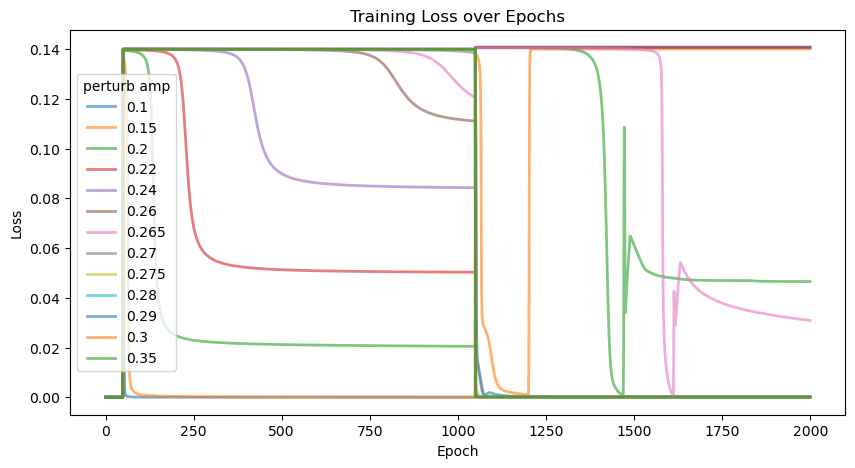

In [12]:
# Plotting the loss
fig, ax = plt.subplots(figsize=(10, 5))
for i, simu_losses in enumerate(all_simu_losses):
    # if i > 2:
    #     continue
    plt.plot(range(simu_epochs), simu_losses, label=perturb_amps[i], alpha=0.6, lw=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0,0.02])
# plt.xlim([0,200])
plt.title('Training Loss over Epochs')
plt.legend(title='perturb amp')
plt.savefig('fig/temp_abb05_perturbamp_loss_outsigmoid.png')
plt.show()

In [7]:
recover_costs = []
recover_epochs = []
for k in range(len(all_simu_losses)):
    simu_losses = all_simu_losses[k]
    perturb_last = 1000
    perturb_start = 50
    origin_start = perturb_start + perturb_last

    recover_cost = 0
    recover_epoch = 0
    for i, loss in enumerate(simu_losses):
        if i > origin_start:
            if loss < 0.0001:
                break
            if loss < 1:
                recover_cost += loss
                recover_epoch += 1

    print(recover_cost)
    print(recover_epoch)
    recover_costs.append(recover_cost)
    recover_epochs.append(recover_epoch)

0.4230621084207087
234
114.8431117394939
949
77.33586368552642
949
133.63686043024063
949
133.63463139533997
949
133.5891780257225
949
88.94977778877364
949
0.3402784869540483
120
0.03138640319230035
76
0.010517801762034651
45
0.0010988832800649107
5
0.00014390844444278628
1
0
0


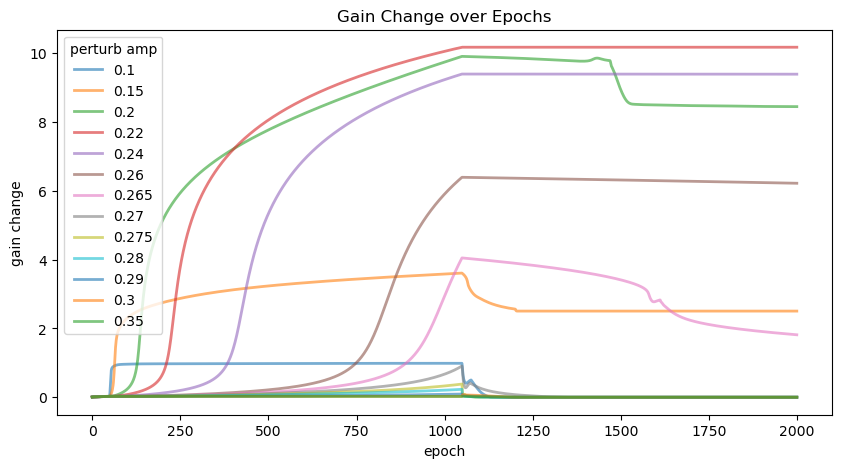

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, gain_changes in enumerate(all_gain_changes):
    plt.plot(np.arange(simu_epochs), gain_changes, label=perturb_amps[i], alpha=0.6, lw=2)
plt.xlabel("epoch")
plt.ylabel("gain change")
plt.legend(title='perturb amp')
plt.title('Gain Change over Epochs')
plt.savefig('fig/temp_abb05_perturbamp_gc_outsigmoid.png')

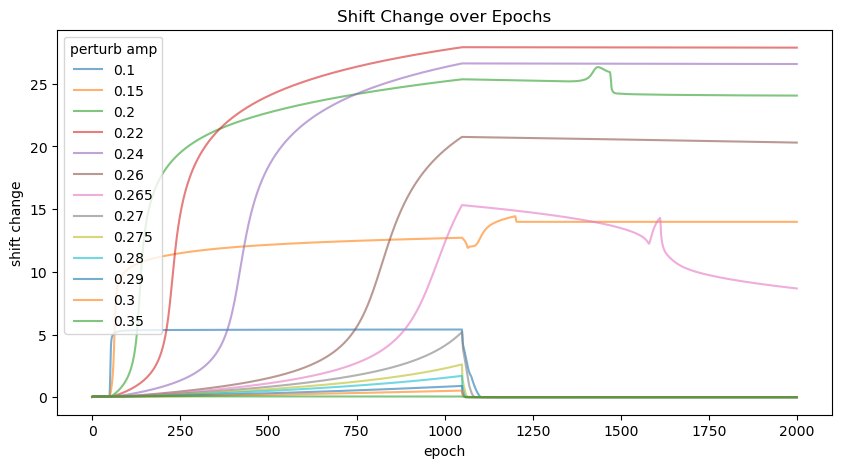

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, shift_changes in enumerate(all_shift_changes):
    plt.plot(np.arange(simu_epochs), shift_changes, label=perturb_amps[i], alpha=0.6)
plt.xlabel("epoch")
plt.ylabel("shift change")
plt.legend(title='perturb amp')
plt.title('Shift Change over Epochs')
plt.savefig('fig/temp_abb05_perturbamp_sc_outsigmoid.png')

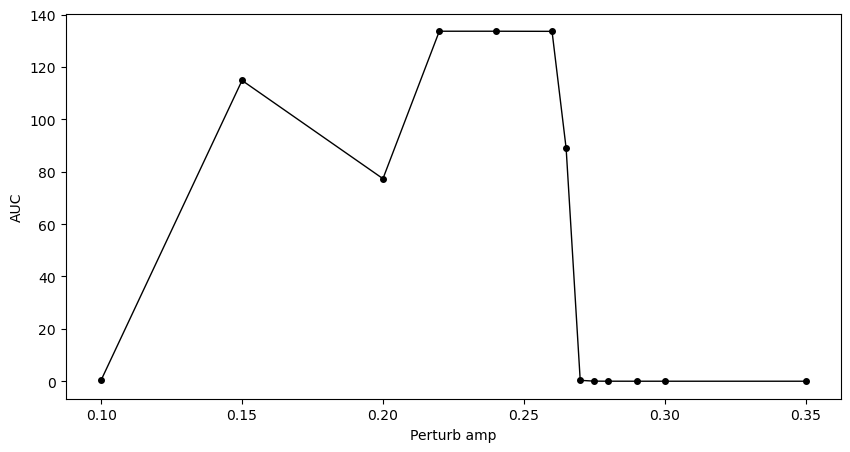

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(perturb_amps, recover_costs, marker='.', lw=1, markersize=8, color='k')
plt.ylabel('AUC')
plt.xlabel('Perturb amp')
plt.savefig('fig/temp_abb05_perturbamp_auc_outsigmoid.png')

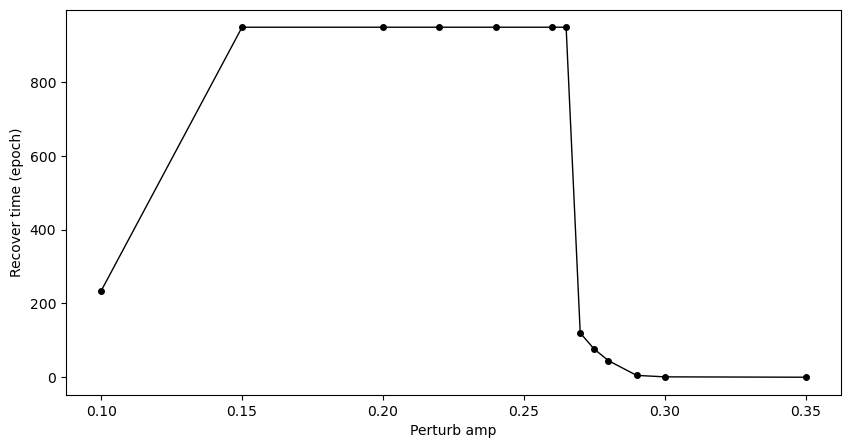

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(perturb_amps, recover_epochs, marker='.', lw=1, markersize=8, color='k')
plt.ylabel('Recover time (epoch)')
plt.xlabel('Perturb amp')
plt.savefig('fig/temp_abb05_perturbamp_rectime_outsigmoid.png')

### Different Perturbation Length

In [33]:
# systematic perturbation amp
perturb_lasts = [500, 1000, 1500, 2000, 2200, 2500, 2800, 3000, 3500]  # for inside sigmoid

# to record
all_simu_losses = []
all_gain_changes = []
all_shift_changes = []
all_simu_weights = []
all_simu_gains = []
all_simu_shifts = []
simu_epochs = 4000
perturb_amp = 1

for perturb_last in perturb_lasts:
    print('Now perturb_last ...:', perturb_last)
    simulator = PerturbNetwork(model_rep, simu_epochs=simu_epochs, perturb_last=perturb_last, perturb_amp=perturb_amp, only_backprop_epoch=0)
    simu_losses, gain_changes, shift_changes, simu_weights, simu_gains, simu_shifts, model_final = simulator.simulate(ndata=200, seed=0, perturb_in_sigmoid=True)
    all_simu_losses.append(simu_losses)
    all_gain_changes.append(gain_changes)
    all_shift_changes.append(shift_changes)
    all_simu_weights.append(simu_weights)
    all_simu_gains.append(simu_gains)
    all_simu_shifts.append(simu_shifts)

Now perturb_last ...: 1000


  1%|▏         | 55/4000 [00:02<02:49, 23.25it/s]

perturbation start!!!


  2%|▏         | 61/4000 [00:02<02:48, 23.41it/s]

perturb learning start!!!


 26%|██▋       | 1054/4000 [00:47<02:07, 23.02it/s]

perturbation end!!!


 27%|██▋       | 1066/4000 [00:47<02:04, 23.50it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:06<00:00, 21.47it/s]


Now perturb_last ...: 1500


  1%|▏         | 54/4000 [00:02<03:04, 21.38it/s]

perturbation start!!!


  2%|▏         | 60/4000 [00:02<03:02, 21.55it/s]

perturb learning start!!!


 39%|███▉      | 1553/4000 [01:11<01:47, 22.67it/s]

perturbation end!!!


 39%|███▉      | 1562/4000 [01:11<01:47, 22.74it/s]

origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:06<00:00, 21.47it/s]


Now perturb_last ...: 2000


  1%|▏         | 54/4000 [00:02<02:58, 22.13it/s]

perturbation start!!!


  2%|▏         | 60/4000 [00:02<02:55, 22.47it/s]

perturb learning start!!!


 51%|█████▏    | 2052/4000 [01:33<01:27, 22.25it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:05<00:00, 21.54it/s]


Now perturb_last ...: 2200


  1%|▏         | 52/4000 [00:02<02:55, 22.44it/s]

perturbation start!!!


  2%|▏         | 61/4000 [00:02<02:53, 22.77it/s]

perturb learning start!!!


 56%|█████▋    | 2254/4000 [01:42<01:16, 22.77it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:05<00:00, 21.55it/s]


Now perturb_last ...: 2500


  1%|▏         | 54/4000 [00:02<02:52, 22.82it/s]

perturbation start!!!


  2%|▏         | 60/4000 [00:02<02:51, 22.97it/s]

perturb learning start!!!


 64%|██████▍   | 2553/4000 [01:56<01:04, 22.52it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:04<00:00, 21.62it/s]


Now perturb_last ...: 3000


  1%|▏         | 52/4000 [00:02<02:56, 22.41it/s]

perturbation start!!!


  2%|▏         | 61/4000 [00:02<02:53, 22.74it/s]

perturb learning start!!!


 76%|███████▋  | 3052/4000 [02:19<00:42, 22.34it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:04<00:00, 21.74it/s]


Now perturb_last ...: 3500


  1%|▏         | 52/4000 [00:02<03:00, 21.84it/s]

perturbation start!!!


  2%|▏         | 61/4000 [00:02<02:54, 22.59it/s]

perturb learning start!!!


 89%|████████▉ | 3554/4000 [02:42<00:19, 22.99it/s]

perturbation end!!!
origin learning start!!!
origin boundary created!!!


100%|██████████| 4000/4000 [03:03<00:00, 21.81it/s]


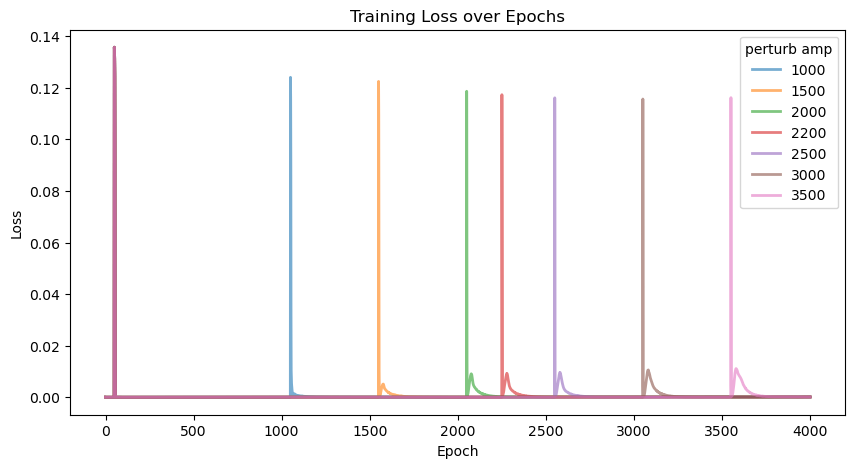

In [35]:
# Plotting the loss
fig, ax = plt.subplots(figsize=(10, 5))
for i, simu_losses in enumerate(all_simu_losses):
    # if i > 2:
    #     continue
    plt.plot(range(simu_epochs), simu_losses, label=perturb_lasts[i], alpha=0.6, lw=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0,0.02])
# plt.xlim([0,200])
plt.title('Training Loss over Epochs')
plt.legend(title='perturb amp')
# plt.savefig('fig/temp_abb05_perturbamp_loss_outsigmoid.png')
plt.show()

In [36]:
recover_costs = []
recover_epochs = []
for k in range(len(all_simu_losses)):
    simu_losses = all_simu_losses[k]
    perturb_last = perturb_lasts[k]
    perturb_start = 50
    origin_start = perturb_start + perturb_last

    recover_cost = 0
    recover_epoch = 0
    for i, loss in enumerate(simu_losses):
        if i > origin_start:
            if loss < 0.0001:
                break
            if loss < 1:
                recover_cost += loss
                recover_epoch += 1

    print(recover_cost)
    print(recover_epoch)
    recover_costs.append(recover_cost)
    recover_epochs.append(recover_epoch)

0.34793813165742904
233
0.4351321530484711
273
0.5050275433095521
295
0.47848107387835626
259
0.4860977086282219
251
0.5964399033255177
287
0.7457986775334575
330


Text(0.5, 1.0, 'Gain Change over Epochs')

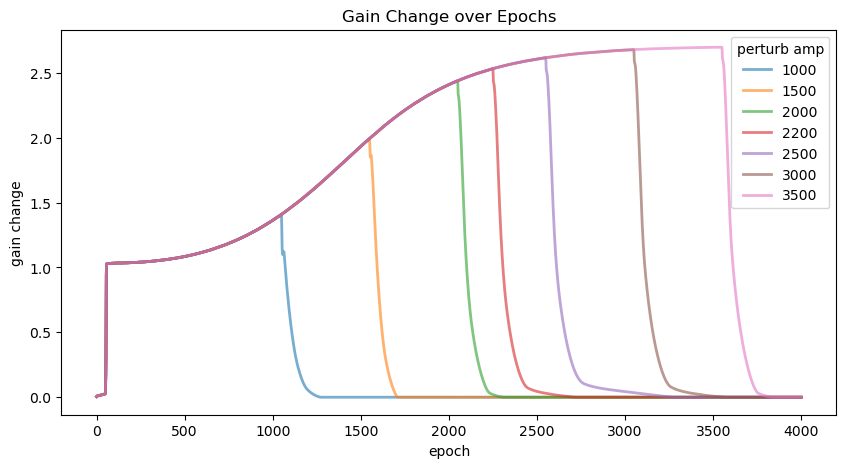

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, gain_changes in enumerate(all_gain_changes):
    plt.plot(np.arange(simu_epochs), gain_changes, label=perturb_lasts[i], alpha=0.6, lw=2)
plt.xlabel("epoch")
plt.ylabel("gain change")
plt.legend(title='perturb amp')
plt.title('Gain Change over Epochs')
# plt.savefig('fig/0221_abb05_perturbamp_gc.png')

Text(0.5, 1.0, 'Shift Change over Epochs')

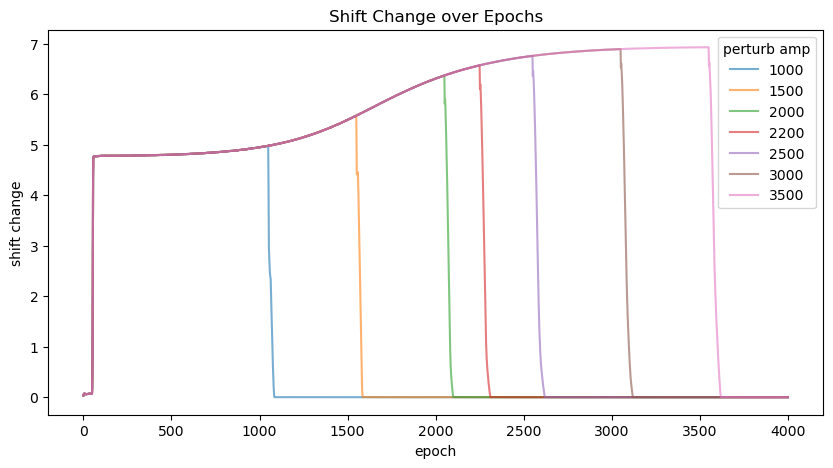

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, shift_changes in enumerate(all_shift_changes):
    plt.plot(np.arange(simu_epochs), shift_changes, label=perturb_lasts[i], alpha=0.6)
plt.xlabel("epoch")
plt.ylabel("shift change")
plt.legend(title='perturb amp')
plt.title('Shift Change over Epochs')
# plt.savefig('fig/0221_abb05_perturbamp_sc.png')

Text(0.5, 0, 'Perturb amp')

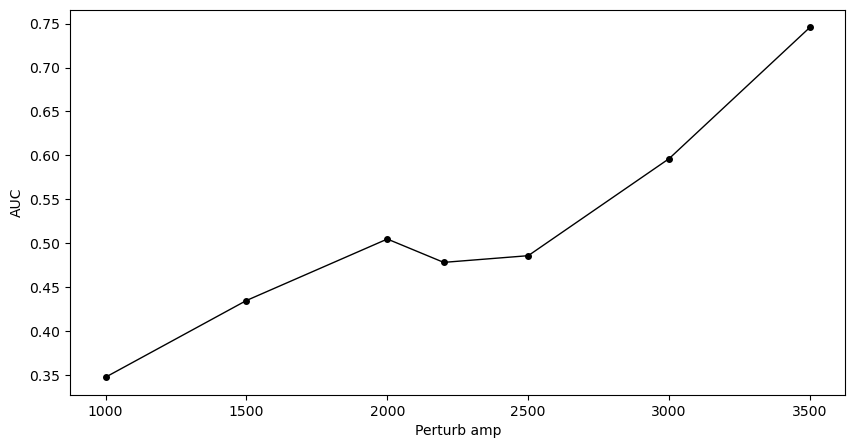

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(perturb_lasts, recover_costs, marker='.', lw=1, markersize=8, color='k')
plt.ylabel('AUC')
plt.xlabel('Perturb amp')
# plt.savefig('fig/0221_abb05_perturbamp_auc.png')

Text(0.5, 0, 'Perturb amp')

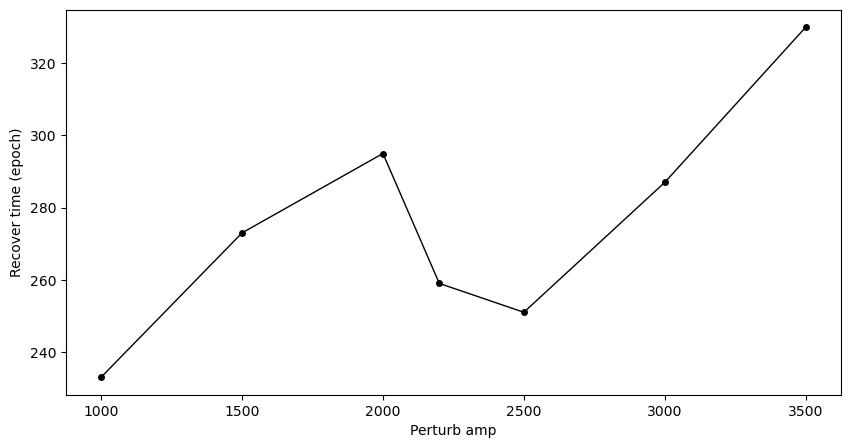

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(perturb_lasts, recover_epochs, marker='.', lw=1, markersize=8, color='k')
plt.ylabel('Recover time (epoch)')
plt.xlabel('Perturb amp')
# plt.savefig('fig/0221_abb05_perturbamp_rectime.png')